# Reflection Test

In [1]:
using Plots

In [2]:
include("./misc.jl")

Main.Misc

In [3]:
parent_dir = expanduser("~/docker-workspace/simulations/")

"/Users/liwei/docker-workspace/simulations/"

In [4]:
function plot_error(dirs; nbuf = 2, lev = 1, tmax = 2.0) 
    fulldirs = parent_dir .* dirs
    dats = Misc.load_data(fulldirs, nbuf, lev, tmax)
    plt = plot()
    for i in 1:length(dats)
        x = dats[i][1]
        psi = dats[i][2]
        err = (psi - analytical_psi.(tmax, x))
        plt = plot!(x, err, label=replace(dirs[i], "Gaussian_2levels_"=>""))
    end
    return plt
end

plot_error (generic function with 1 method)

## Analytic solution

In [5]:
function analytical_psi(t, x; A=1, sig=0.25, c=1, x0=0)
    return 0.5 * (A * exp(-(((c*t-x) - x0) / sig)^2) + A * exp(-(((c*t+x) - x0) / sig)^2))
end

analytical_psi (generic function with 1 method)

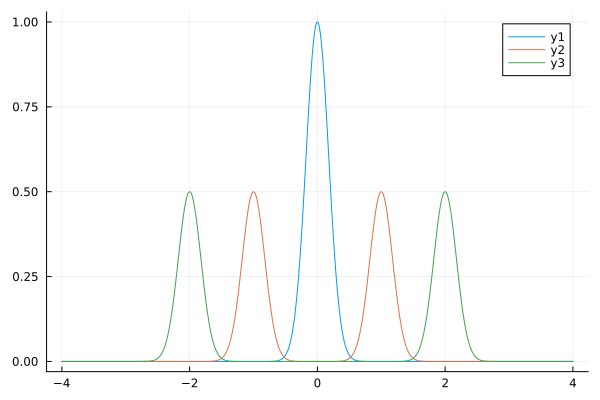

In [6]:
plot(x->analytical_psi(0.0, x), -4.0, 4.0)
plot!(x->analytical_psi(1.0, x), -4.0, 4.0)
plot!(x->analytical_psi(2.0, x), -4.0, 4.0)

## Numerical Errors

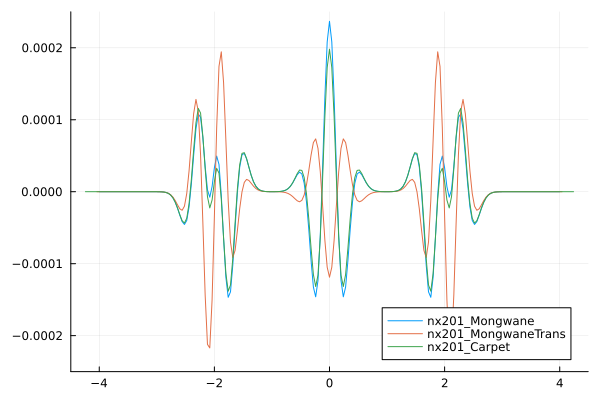

In [7]:
plot_error(
    [
        "Gaussian_2levels_nx201_Mongwane",
        "Gaussian_2levels_nx201_MongwaneTrans",
        "Gaussian_2levels_nx201_Carpet",
    ]; nbuf = 2, tmax = 1.98)
plot!(ylim = (-2.5e-4, 2.5e-4))

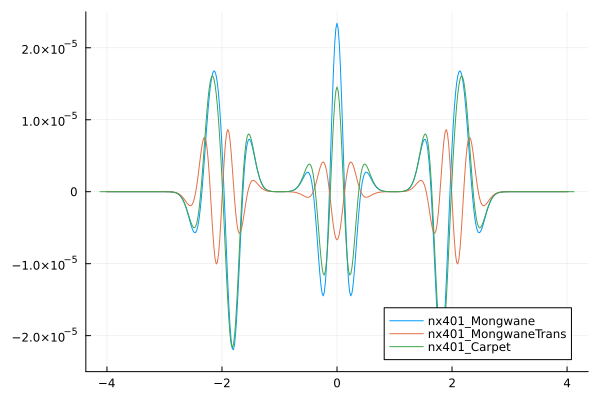

In [8]:
plot_error(
    [
        "Gaussian_2levels_nx401_Mongwane",
        "Gaussian_2levels_nx401_MongwaneTrans",
        "Gaussian_2levels_nx401_Carpet",
    ]; nbuf = 2, tmax = 1.98)
plot!(ylim = (-2.5e-5, 2.5e-5))

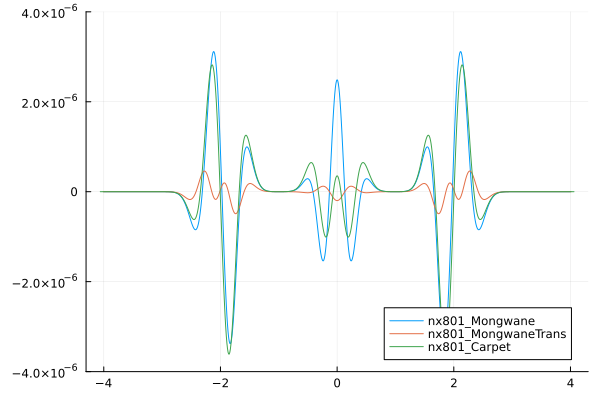

In [9]:
plot_error(
    [
        "Gaussian_2levels_nx801_Mongwane",
        "Gaussian_2levels_nx801_MongwaneTrans",
        "Gaussian_2levels_nx801_Carpet",
    ]; nbuf = 2, tmax = 1.98)
plot!(ylim = (-4e-6, 4e-6))

### Generate gifs

[ Info: Saved animation to /Users/liwei/docker-workspace/simulations/psi_error.gif


Plots.AnimatedGif("/Users/liwei/docker-workspace/simulations/psi_error.gif")
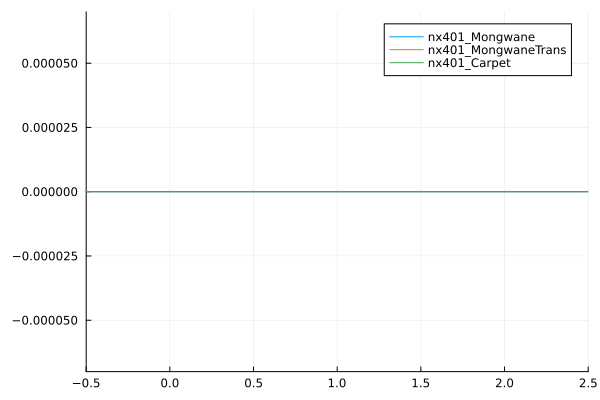

In [10]:
a_err = Animation()
for t in LinRange(0.0, 3.2, 161)
    plt = plot_error(
        [
            "Gaussian_2levels_nx401_Mongwane",
            "Gaussian_2levels_nx401_MongwaneTrans",
            "Gaussian_2levels_nx401_Carpet",
        ]; nbuf = 2, lev = 1, tmax = t)
    plt = plot!(xlim=(-0.5,2.5),ylim = (-7e-5,7e-5))
    frame(a_err, plt)
end
gif(a_err, parent_dir * "psi_error.gif")